# Octaves
#### This notebook showcases the functions used to generate Gaussian and Difference of Gaussian octaves. 
These notebooks are meant as a visual aid, not as an explanaition.     
For details on the funcitons used, refer to the python files, and the following papers:  
* Anatomy of the SIFT Method. Otero, Ives Rey. Diss. École normale supérieure de Cachan-ENS Cachan, 2015.
* Sift-the scale invariant feature transform. Lowe. Int. J, 2(91-110), 2, 2004.

## Imports

In [1]:
# Handles relative import
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import const
import octaves as octaves_lib

## Image content

mean:  0.380
variance: 0.062


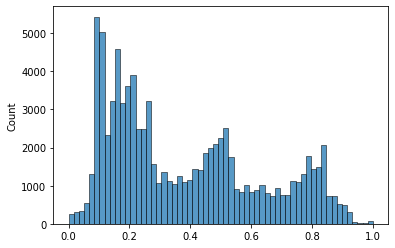

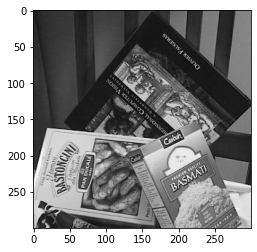

In [2]:
img = cv2.imread('../images/box_in_scene.png', flags=cv2.IMREAD_GRAYSCALE)
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img = img[0:300, 100:400]
print(f'mean:  {img.mean() :.3f}')
print(f'variance: {img.var() :.3f}')

sns.histplot(img.flatten())
plt.show()
plt.imshow(img, cmap='gray')

## Octaves

<Figure size 1440x1440 with 0 Axes>

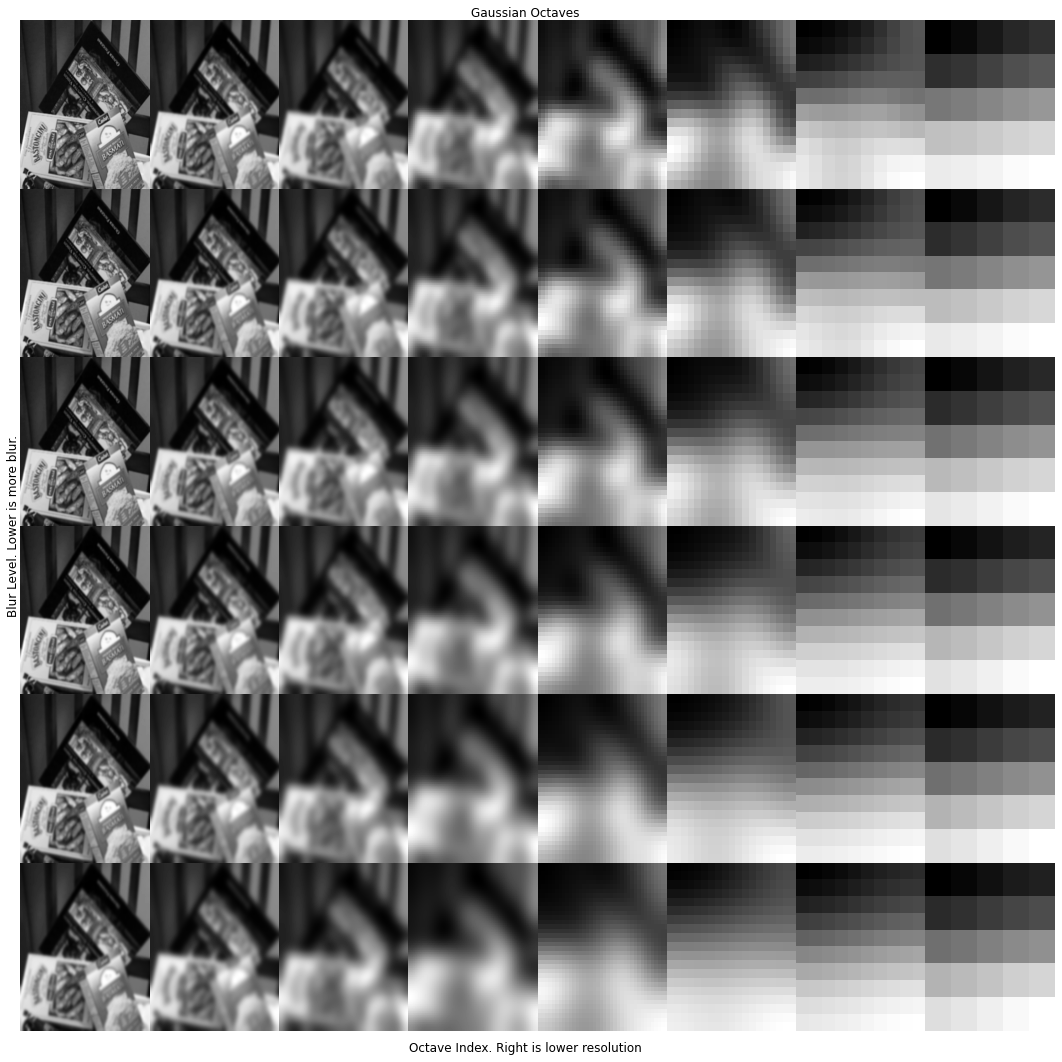

In [3]:
octaves = octaves_lib.build_gaussian_octaves(img)

plt.figure(figsize=(20,20))

nr_cols = len(octaves) 
nr_rows = len(octaves[0])
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(15, 15), gridspec_kw={'wspace':0, 'hspace':0}, squeeze=True)

for col, octave in enumerate(octaves): 
    for row, layer in enumerate(octave):
        axs[row][col].axis('off')
        axs[row][col].imshow(layer, cmap='gray', aspect='auto')
        
fig.suptitle('Gaussian Octaves')
fig.supxlabel('Octave Index')
fig.supylabel('Blur Level')
plt.tight_layout()
plt.show()

## Difference of Gaussians

<Figure size 1440x1440 with 0 Axes>

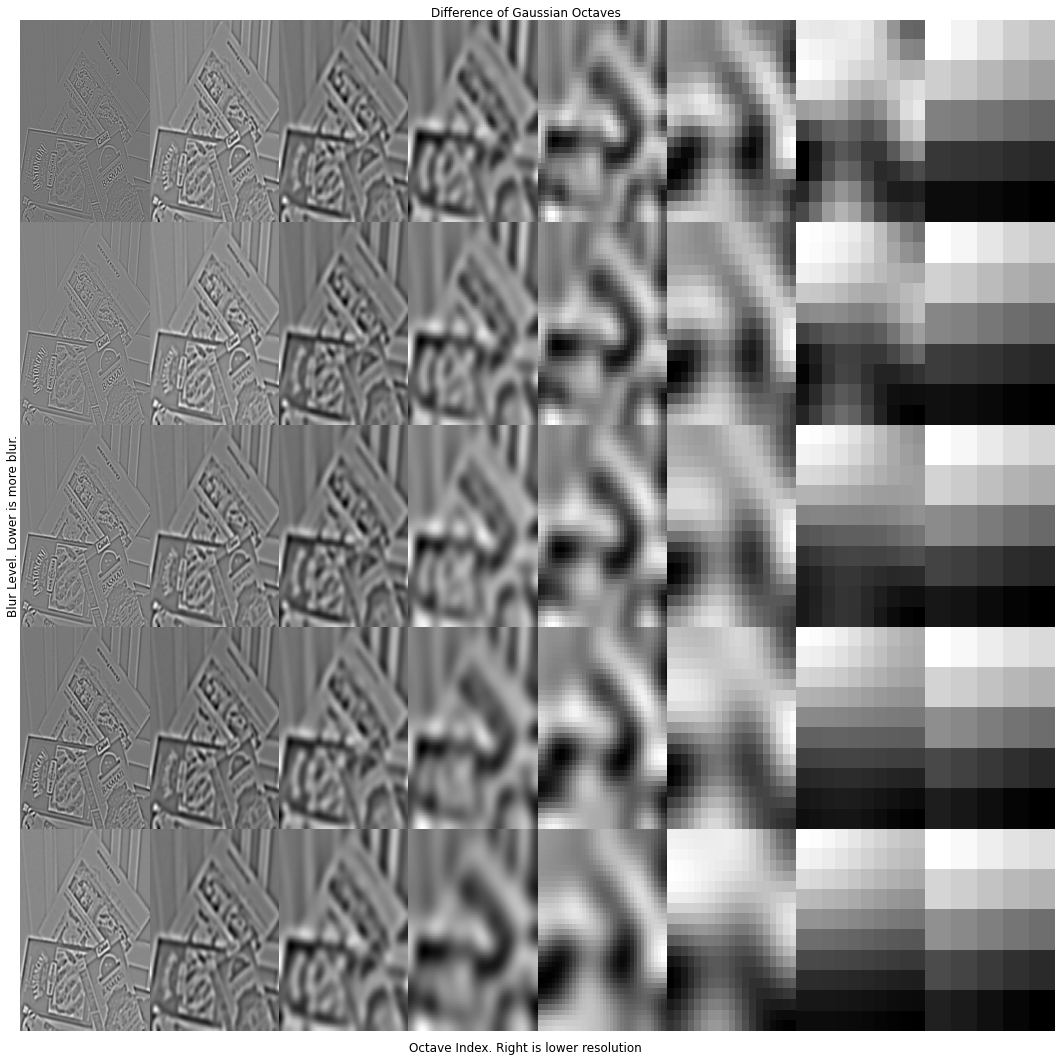

In [7]:
dogs = [octaves_lib.build_dog_octave(octave) for octave in octaves]

plt.figure(figsize=(20,20))

nr_cols = len(dogs) 
nr_rows = len(dogs[0])
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(15, 15), gridspec_kw={'wspace':0, 'hspace':0}, squeeze=True)

for col, dog in enumerate(dogs): 
    for row, layer in enumerate(dog):
        axs[row][col].axis('off')
        axs[row][col].imshow(layer, cmap='gray', aspect='auto')
            
fig.supxlabel('Octave Index')
fig.supylabel('Blur Level')
fig.suptitle('Difference of Gaussian Octaves')
plt.tight_layout()
plt.show()

## Extrema in Difference of Gaussians
Extrema are not found in the first and last layer (or row, as in this visualization).    
This is due to the fact that these layers do not have 2 neighboring layers in scale space.   
That is, in these layers there are no [3,3,3] neighborhoods around pixels in which extrema can be found.

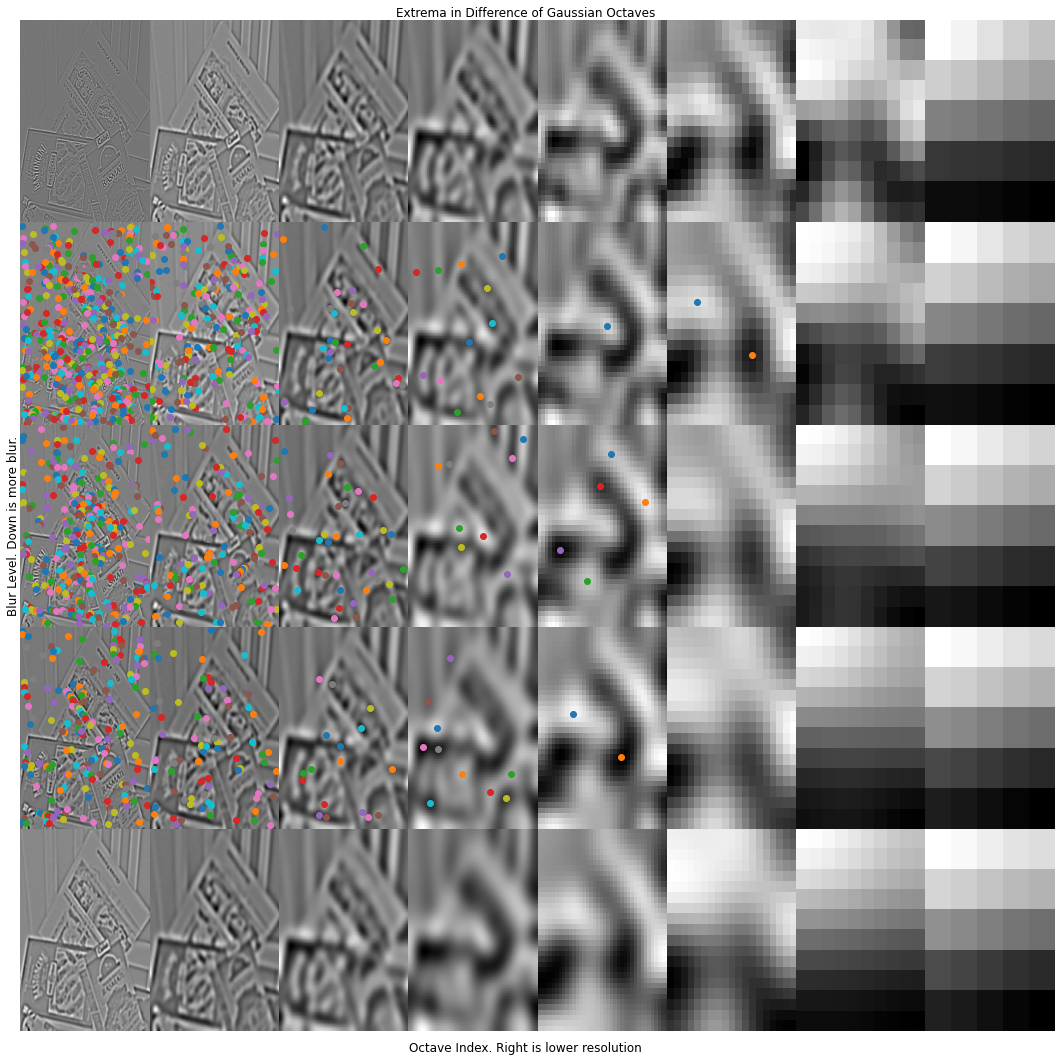

In [8]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(15, 15), gridspec_kw={'wspace':0, 'hspace':0}, squeeze=True)

for col, dog in enumerate(dogs):                          
    extrema = octaves_lib.find_dog_extrema(dog)
                          
    for row, layer in enumerate(dog):                  
        axs[row][col].axis('off')
        axs[row][col].imshow(layer, cmap='gray', aspect='auto')
        
    for s, y, x in extrema.T:
        axs[s][col].scatter(x, y)
                          
fig.supxlabel('Octave Index')
fig.supylabel('Blur Level')
fig.suptitle('Extrema in Difference of Gaussian Octaves')
plt.tight_layout()
plt.show()